# Solution- Task interferences of characteristic X-ray lines

<b>Step 1:</b><br>
Import the required libraries and read in the required data file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

df = pd.read_csv('data/transition_energies.csv')
df

,El,Energy (keV),I,LDE1,LDE2,LDE4,LIF,Lambda (A),Line,Line old,PET,STE,TAP,Z
0,Mg,1.301964,5.0,44.431333,27.202857,66.64700,662.050811,9.52100,K$\beta$,K_,304.950812,26.552590,103.501184,12
1,Be,0.108737,100.0,532.000000,325.714286,798.00000,7927.086696,114.00000,K$\alpha$,K_,3651.338367,317.928287,1239.274760,4
2,Al,0.086989,NaN,665.000000,407.142857,997.50000,9908.858370,142.50000,Al1,Al1,4564.172958,397.410359,1549.093450,13
3,Cl,2.815097,8.0,20.549200,12.581143,30.82380,306.194154,4.40340,K$\beta$,K_,141.037749,12.280398,47.868618,17
4,Ar,3.202356,NaN,18.064200,11.059714,27.09630,269.166315,3.87090,AK,AK,123.982155,10.795339,42.079901,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,U,11.616313,3.0,4.979893,3.048914,7.46984,74.203094,1.06712,L$\iota$,L_,34.179089,2.976032,11.600481,92
1611,U,3.335845,60.0,17.341333,10.617143,26.01200,258.395212,3.71600,MB,MB,119.020819,10.363347,40.396009,92
1612,U,3.719172,NaN,15.554000,9.522857,23.33100,231.762982,3.33300,Am4,Am4,106.753603,9.295219,36.232480,92
1613,Np,20.781224,10.0,2.783667,1.704286,4.17550,41.478133,0.59650,LG1,LG1,19.105468,1.663546,6.484451,93


<b>Step 2:</b><br>
Make a stem plot displaying the relative intensities versus the intensities of the characteristic X-ray lines.

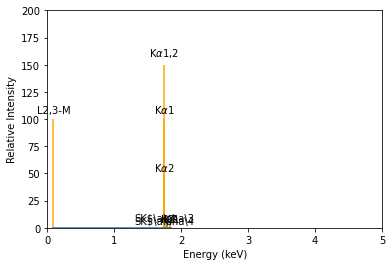

In [2]:
x = [1, 1.4, 3, 4.7]
y = [10, 30, 7, 45]

selEl = 'Si'
xMin = 0
xMax = 5
yMax = 200

fil = (df['El'] == selEl) & (df['Energy (keV)'] > xMin) & (df['Energy (keV)'] < xMax)
el = df[fil]
x = el['Energy (keV)']
y = el['I']
label = el['Line']

plt.stem(x, y, basefmt = 'C0', markerfmt = ' ', linefmt = 'orange')

plt.xlim(xMin, xMax)
plt.ylim(0, yMax)
plt.xlabel('Energy (keV)')
plt.ylabel('Relative Intensity')

for i in range(len(x)):
    if np.isnan(y.iloc[i]) == False:
        plt.text(x.iloc[i], 1.05 * y.iloc[i], label.iloc[i], ha = 'center')

plt.show()

<b>Step 3:</b><br>
Add a second element/plot and make everyting interactive.

In [3]:
def f(selEl, selEl2, xMin, xMax, yMax):
    fil = (df['El'] == selEl) & (df['Energy (keV)'] > xMin) & (df['Energy (keV)'] < xMax)
    el = df[fil]
    x = el['Energy (keV)']
    y = el['I']
    label = el['Line']
    
    fil2 = (df['El'] == selEl2) & (df['Energy (keV)'] > xMin) & (df['Energy (keV)'] < xMax)
    el2 = df[fil2]
    x2 = el2['Energy (keV)']
    y2 = el2['I']
    label2 = el2['Line']

    plt.stem(x, y, basefmt = 'C0', markerfmt=' ', linefmt = 'orange')
    plt.stem(x2, y2, basefmt = 'C0', markerfmt=' ', linefmt = 'blue')
    
    plt.ylim(0, yMax)
    plt.xlim(xMin, xMax)
    plt.xlabel("Energy (keV)")
    plt.ylabel("Relative Intensity")
    
    for i in range(len(label)):
        if np.isnan(y.iloc[i]) == False:
            plt.text(x.iloc[i], y.iloc[i]+.05*yMax, label.iloc[i], ha = 'center')
    for i in range(len(label2)):
        if np.isnan(y2.iloc[i]) == False:
            plt.text(x2.iloc[i], y2.iloc[i]+.05*yMax, label2.iloc[i], ha = 'center')
    
    plt.text(xMin+.9*(xMax-xMin), .9*yMax, selEl, color = 'orange', size = 12)
    plt.text(xMin+.9*(xMax-xMin), .82*yMax, selEl2, color = 'blue', size = 12)
            
    plt.show()

elements = sorted(df['El'].drop_duplicates())

interact(f, selEl = elements, selEl2 = elements, xMin = (0,20,.1), xMax = (0,30,.1), yMax = (100,300))

interactive(children=(Dropdown(description='selEl', options=('Ac', 'Ag', 'Al', 'Am', 'Ar', 'As', 'At', 'Au', '…

<function __main__.f(selEl, selEl2, xMin, xMax, yMax)>